In [17]:
import torch
from tqdm import tqdm
from dataloader import get_dataset
from torch.utils.data import DataLoader
from networks.pointnet.pointnet import PointNetCls, feature_transform_regularizer
from utils.utils import get_classes
from sklearn.metrics import confusion_matrix
from networks.pointmlp.pointmlp import pointMLP, pointMLPElite

In [6]:
device = "cpu"

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device) 

cuda:0


In [20]:
def eval_model(classifier, dataloader):
    model.to(device)
    total_correct = 0
    total_testset = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader, 0)):
            points, target = data["pointcloud"], data["category"]
            # target = target[:, 0]
            points = points.transpose(1, 2)
            points, target = points.to(device), target.to(device)
            print("target", target) 
#             pred, __, __ = classifier(points)
            pred = classifier(points)
            pred_choice = pred.data.max(1)[1]
            print("pred", pred_choice) 
            correct = pred_choice.eq(target.data).cpu().sum()
            print("correct", correct) 
            total_correct += correct.item()
            total_testset += points.size()[0]
    print("final accuracy {}".format(total_correct / float(total_testset)))
    return (total_correct / float(total_testset))

In [24]:
def eval_by_class(classifier, dataloader): 
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            print('Batch [%4d / %4d]' % (i+1, len(val_loader)))
            
            inputs, labels = data['pointcloud'].float(), data['category']
#             outputs, __, __ = classifier(inputs.transpose(1,2))
            outputs = classifier(inputs.transpose(1,2))
            _, preds = torch.max(outputs.data, 1)
            all_preds += list(preds.numpy())
            all_labels += list(labels.numpy())
            if i == 10: 
                break
    cm = confusion_matrix(all_labels, all_preds)
    return cm

In [21]:
dataset_path = "data"
model_path = "pointMLP_cls_model_50.pth"
val_annot, val_ds = get_dataset(dataset_path, "test", False)
val_loader = DataLoader(val_ds, batch_size=64)
# print(val_loader[0])
# model = PointNetCls(k=len(get_classes(val_annot)), feature_transform=False)
model = pointMLPElite()
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval();

In [22]:
acc = eval_model(model, val_loader)

0it [00:00, ?it/s]

target tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


1it [00:40, 40.81s/it]

pred tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
correct tensor(64)
target tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


2it [01:22, 41.51s/it]

pred tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 11, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 60,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0])
correct tensor(61)
target tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


3it [02:02, 40.59s/it]

pred tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        60,  0,  0,  0,  0,  0,  0,  0,  0,  0])
correct tensor(63)
target tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


4it [02:45, 41.50s/it]

pred tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
correct tensor(64)
target tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


5it [03:27, 41.91s/it]

pred tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
correct tensor(64)
target tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


6it [04:09, 41.69s/it]

pred tensor([ 0,  0,  0,  0,  0,  0, 44, 44, 44, 44, 44, 44, 44, 44, 35, 44, 44, 44,
        44, 44, 44, 44, 44, 44, 44, 44, 44, 66,  2,  2,  2,  2,  2, 39,  2, 41,
         2,  2,  2, 39,  2,  2,  2, 39,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2])
correct tensor(38)
target tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


7it [04:49, 41.31s/it]

pred tensor([ 2, 39,  2,  2,  2,  2, 57,  2,  2,  2, 35,  2,  2, 42, 53,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  9,  2,  2, 39, 39,  2, 25,  2, 11,  2, 25,  2,
        12,  2,  2,  2, 53, 53, 35, 46,  2,  2,  2,  2,  2, 16, 66,  2, 25,  2,
         2,  2,  2,  2, 39, 39, 66, 37, 37, 37])
correct tensor(39)
target tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


8it [05:29, 40.86s/it]

pred tensor([25, 66,  2,  2,  2,  2, 53,  2,  2,  2,  2,  2,  2, 46, 46, 19,  2,  9,
         2,  2,  2,  2,  2, 41,  2,  2,  2, 39,  2,  2, 39,  2,  2,  2, 39, 43,
         2,  2,  2,  2,  2,  2,  2, 39,  2,  9, 50,  2,  2, 53, 39,  3, 20,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3])
correct tensor(46)
target tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])


9it [06:11, 41.24s/it]

pred tensor([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3, 28, 20, 20,  3,  3,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4])
correct tensor(61)
target tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])


10it [06:52, 41.08s/it]

pred tensor([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 64, 14, 19, 19, 14,
        64, 14, 19, 64, 50, 19, 14, 35, 19, 19, 19, 19, 14, 14,  6,  6, 14,  6,
         6,  6,  6,  6, 37, 14, 14,  6,  6,  6,  6,  6,  6,  6,  9,  9, 16, 26,
        37, 19, 17, 42, 19, 32, 61, 14, 32, 19])
correct tensor(27)
target tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])


11it [07:33, 41.24s/it]

pred tensor([37, 39, 42, 37, 19, 19, 32, 32, 50, 19, 66, 26, 17, 24, 64, 19, 50, 39,
        14, 61,  2,  2, 29, 29, 20,  2, 16,  2, 41,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9])
correct tensor(35)
target tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])


12it [08:15, 41.26s/it]

pred tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
correct tensor(64)
target tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])


13it [08:56, 41.18s/it]

pred tensor([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 18,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9])
correct tensor(63)
target tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])


14it [09:37, 41.30s/it]

pred tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
correct tensor(64)
target tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])


15it [10:19, 41.28s/it]

pred tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
correct tensor(64)
target tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])


15it [10:22, 41.53s/it]


KeyboardInterrupt: 

In [25]:
cm = eval_by_class(model, val_loader)

Batch [   1 /  183]
Batch [   2 /  183]
Batch [   3 /  183]
Batch [   4 /  183]
Batch [   5 /  183]
Batch [   6 /  183]
Batch [   7 /  183]
Batch [   8 /  183]
Batch [   9 /  183]
Batch [  10 /  183]
Batch [  11 /  183]


In [26]:
print(cm)
print(len(cm))

[[324   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 105 ...   0   0   3]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
36


In [36]:
socre_by_class = {}
for c in cm: 
    print(c) 
# classes = get_classes(val_annot)
# print(classes[0])

[324   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0 20  0  0  0  0  0  0  0  0]
[  0   0 105   0   0   0   0   0   0   1   1   0   0   0   2   2   0   3
   0   0   1   0   2   2   8   3   2   0   3   2   8   4   0   0   0   3]
[ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 1 5 0 6 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 2 1]
[ 0  0  0  0  0  0 13  0  0  2  0  0  3  0  1  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 3 2 6 0 1 0 2 0 0 5 1 2 3 0 0 0 0 2 0 1 0 1 0 2]
[0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]
[ 0  0  0  0  0  0  0  0  0 35  0  0  0 

In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# function from https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


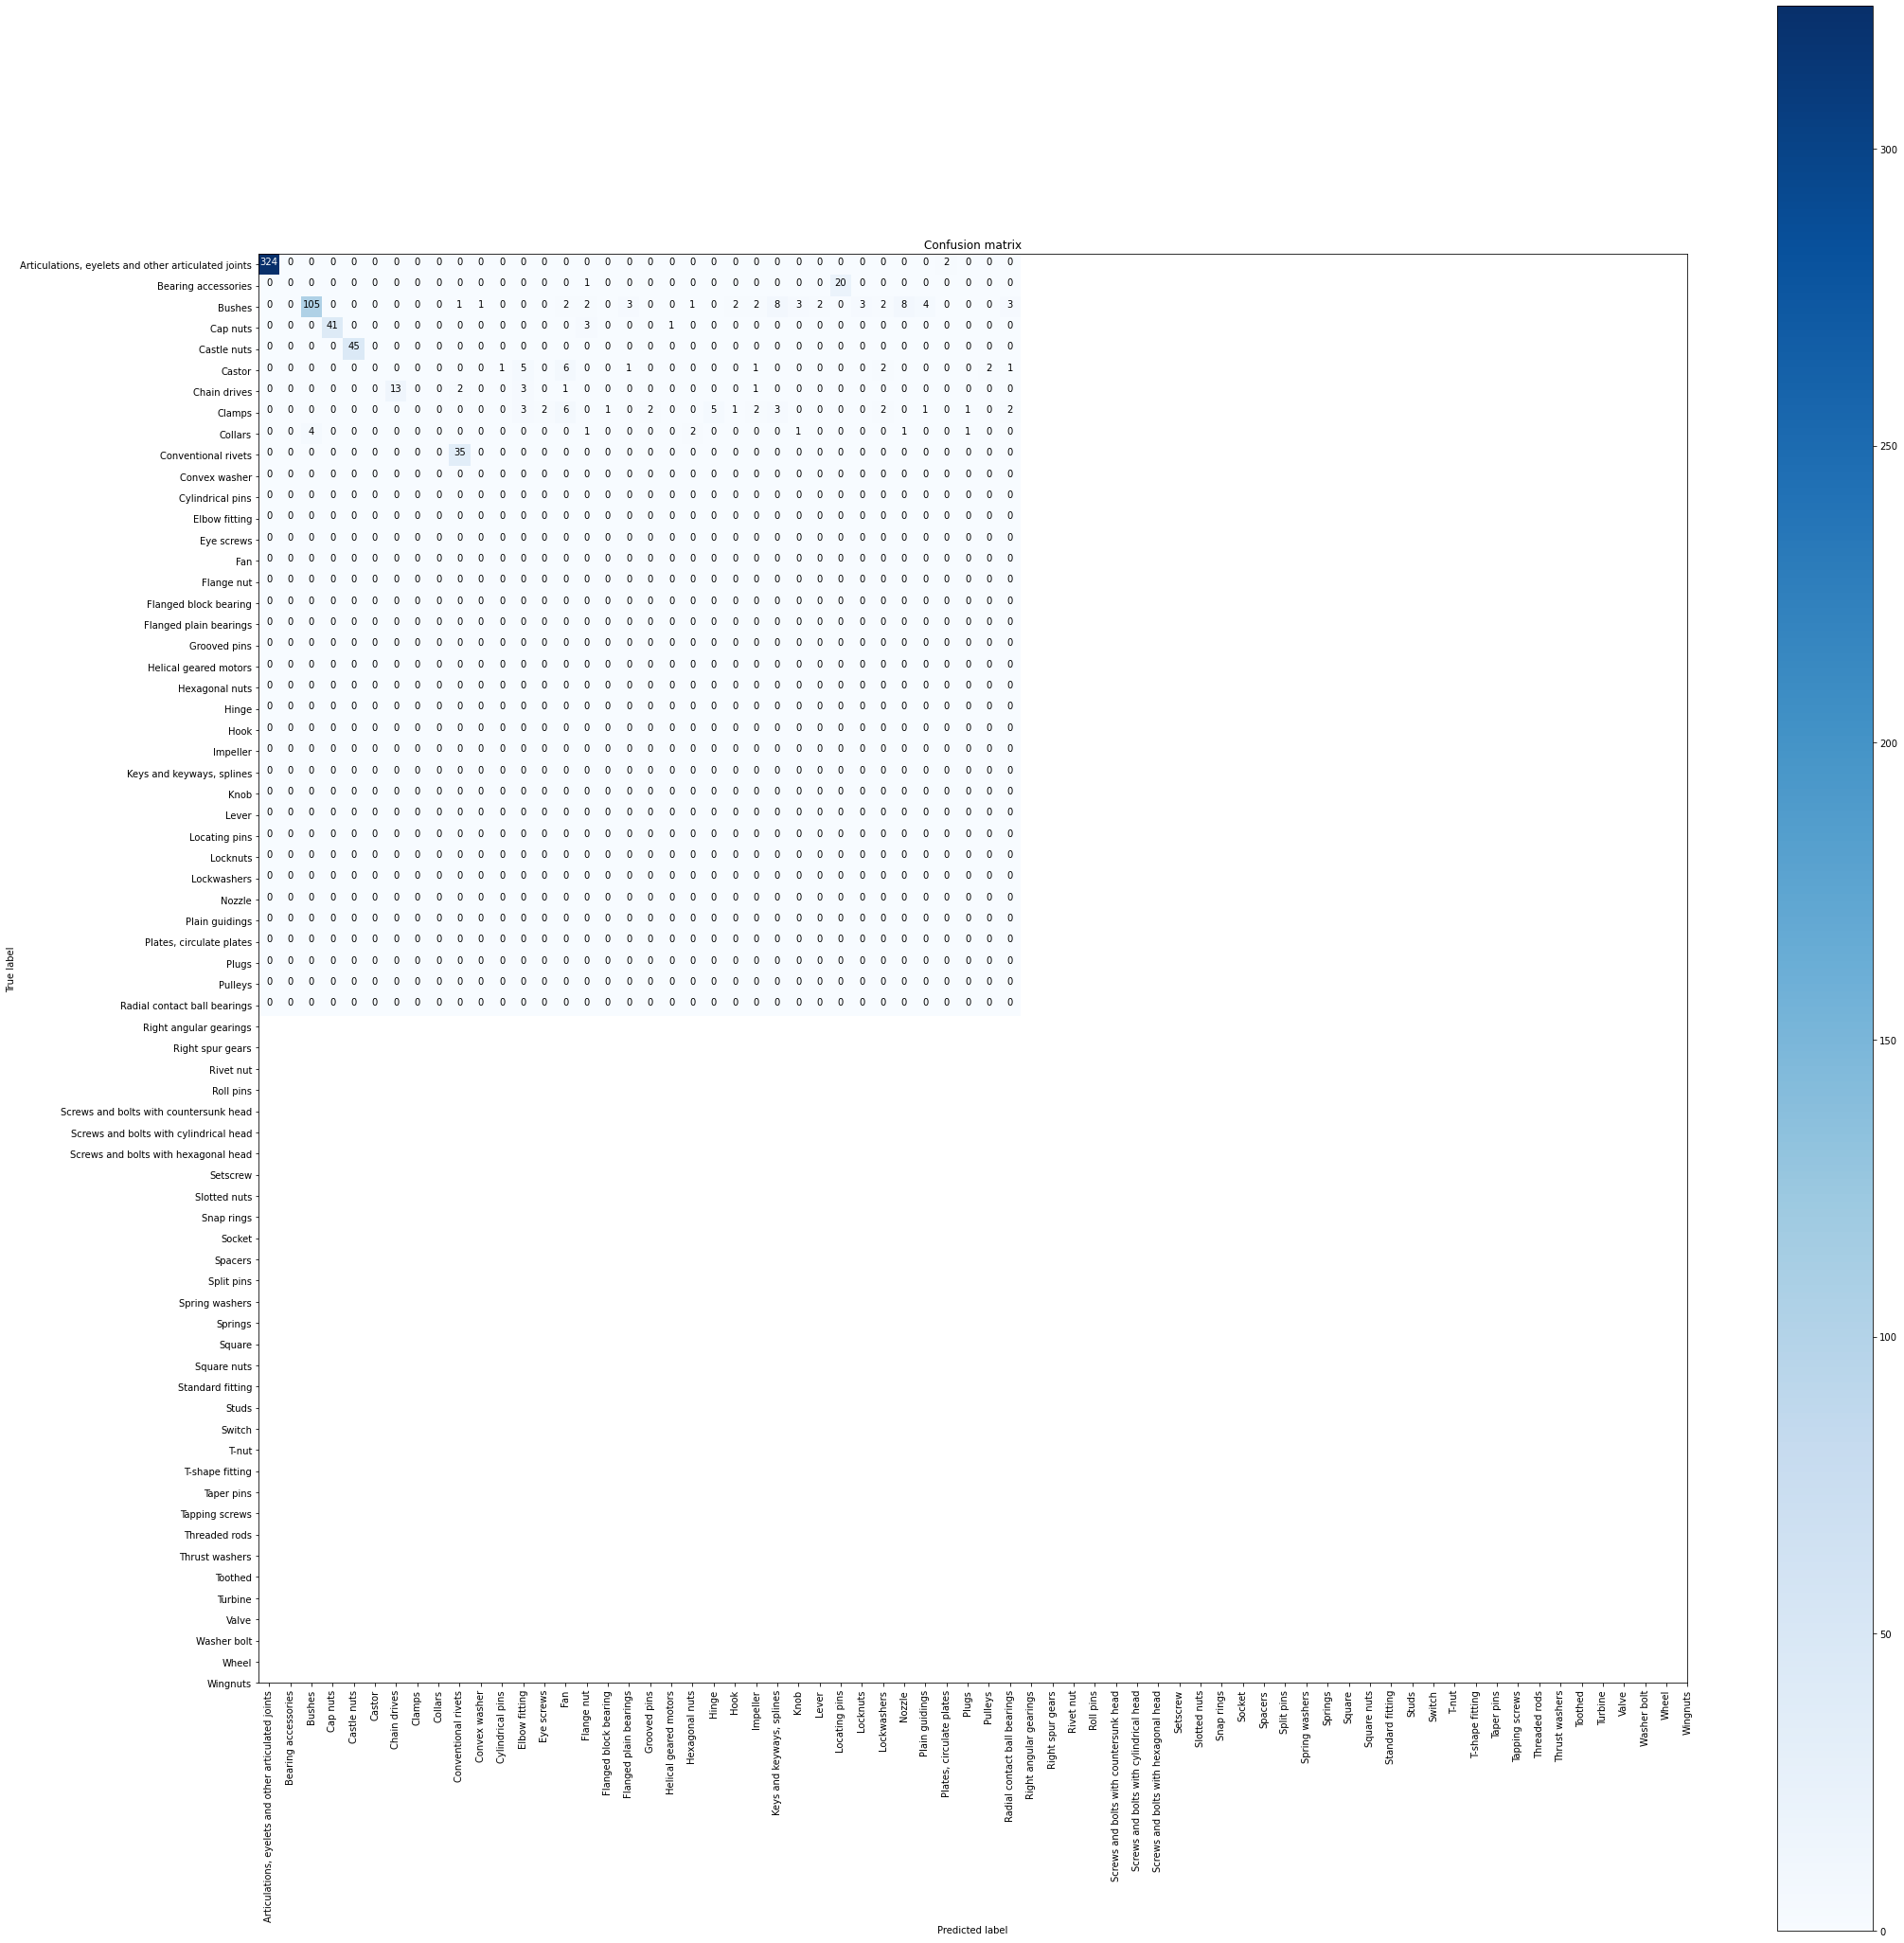

In [42]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(cm, get_classes(val_annot)) 
plt.savefig("myimg.svg")